# Homewok 4: Fully connected neural network

Welcome to the course **AI and Deep learning**! In this homework, we are going to train a fully connected neural network with multiple hidden layers. For simplicity, we consider a binary classification problem, and use ReLU activation function for the hidden layers and use sigmoid for the output layer. For other activation functions, the code can be modified easily. 


**Learning Goal**: In this homework, we mainly implement the forward propagation and backpropagation.  After this homework, you will know:
 * How to code up a fully connected neural network with multiple hidden layer.
 * How differently neural networks perform with different hidden nodes.
 


## Table of content
* [1 - Packages](#1)
* [2 - Fully Connected Neural Network](#2)
  * [2.1 - Generate a training dataset](#2.1)
  * [2.2 - Parameter estimation](#2.2)
  * [2.3 - Integration](#2.3)
  * [2.4 - Prediction](#2.4)
  * [2.5 - Play by yourself!](#2.5)



<a name='1'></a>
## 1- Packages

In order to finish a task, we need commands from certain **Python** packages. Again, one of the commonly used package is **numpy**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt # for plots

<a name='2'></a>
## 2 - Fully Connected Neural Network

<a name='2.1'></a>
### 2.1 - Generate a training dataset

First, we generate a training dataset from a pre-specified logistic regression model. **In order to guarantee that our simulation results are reproducible, we need to control the random seed.** That is, after controlling the seed, others can generate the **SAME** random variables as we did, so our simulation results can be reproduced.

Consider the following logistic regression model 
$$
y^{(i)}\sim\mbox{Bernoulli}\{\pi(x^{(i)})\},\\
\pi(x^{(i)}) = \lVert x^{(i)}\rVert/2,$$
where $\mbox{Bernoulli}(p)$ is a Bernoulli distribution with success probability $p$, $x^{(i)} = (x^{(1i)},x^{(2i)})^T$, $x^{(1i)} = r^{(i)}\cos(\theta^{(i)})$, $x^{(2i)} = r^{(i)}\sin(\theta^{(i)})$, $r^{(i)}\sim\mbox{Uniform}(0,2)$, $\theta^{(i)}\sim\mbox{Uniform}(0,2\pi)$, $\mbox{Uniform}(a,b)$ is a uniform distribution over the interval $(a,b)$, and $\lVert x\rVert = (x_1^2+x_2^2)^{1/2}$ is the Euclidean norm for a vector $x=(x_1,x_2)^T$. Clearly, the training data is not generated from a logistic regression model. This is the same model we have used in the previous homework.

Let us write a function to generate a training dataset of size $n$ with a random number $rn$. 

In [2]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
def train_data_generation(n, rn):
    # n: sample size
    # rn: random seed
    
    np.random.seed(rn)
    r = np.random.uniform(0,2,(n,1))
    theta2 = np.random.uniform(0,2*np.pi,(n,1))
    x = np.concatenate((r * np.cos(theta2), r * np.sin(theta2)),axis = 1)
    y = np.random.binomial(1, r/2, (n,1))
    
    return x, y

To visualize your data, you may would like to run the following code.

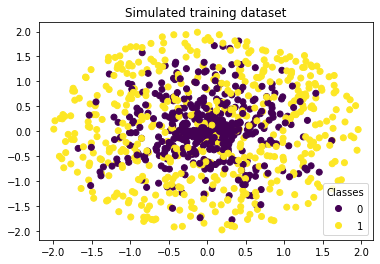

In [3]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
x, y = train_data_generation(1000, 100)

fig, ax = plt.subplots()
scatter = ax.scatter(x[:,0], x[:,1],  c=y[:,0])
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Classes")
ax.set_title('Simulated training dataset')
plt.show()


We need two activation functions. One is the sigmoid activation function, $\sigma(z)=(1+\exp(-z))^{-1}$ with $\sigma'(z)=\sigma(z)\{1-\sigma(z)\}$, and the other one is the ReLU activation function, $\sigma(z)=\max\{0,z\}$ with $\sigma'(z)=1_{z>0}(z)$, where $1_{z>0}(z)$ is an indicator function with $1_{z>0}(z)=1$ if $z>0$ and 0 otherwise.

In [4]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
def sigmoid(x):
    # x: input
    sig = 1/(1 + np.exp(-x))
    return sig

In [5]:
# PLEASE DO NOT CHANGE THE EXISTING CODE
def ReLU(x):
    # x: input
    
    ### YOUR CODE BEGINS HERE (approximately 1 line)
    y = np.where(x<0,0,x)
    ### YOUR CODE ENDS
    
    return y

<a name='2.2'></a>
### 2.2 - Parameter estimation 

The following code is useful to briefly understand the `dictionary` structure. **The following commands are EXTREMELY important, although it is not so complex.**

In [6]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
dic = {'W[0]': 0 , 'W[1]':1} # Construct a dictionary

In [7]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
i=0
dic['W['+str(i)+']'] #use variables to extract the values for `W[0]`

0

In [8]:
dic={} # declare an empty dictionary
dic['W']=0 # add a new key and value pair to the dictionary
dic['W'] # print the value for the key 'W'

0

For a fully connected neural network with $L$ layers, we will use a dictionary `par` to store the values for the parameters and use a dictionary `grad` to store those for the gradients. Please notice that the two dictionaries are updated until convergence. Use a list `n_l` to denote the number of neurons in each layer. For example, if `n_l = np.array([4,5,6,1])`, then the first layer has 4 neurons, the second one has five, the third has six, and the last has one. Please remember, the input layer is the 0th layer, and its dimension is $d$. **Thus, we need to augment `n_l` by $d$ as the first element to obtain the structure for the fully connected neural network.** The following command may be useful:
  * `np.insert`: check the help for details.

First, we need to initilize the two dictionaries. We implement the following strategies for initialization. 
   * Initialize the weights by a random vector, whose elements are independently generated from a normal distribution with mean zero and standard deviation one. Please use a random seed to keep the code reproducible.
   * Initialize the bias by zero.

In [9]:
# PLEASE DO NOT CHANGE THE EXISTING CODE
def Initialize_pars(d,L,n_l, rn):
    # d: the dimension of the feature.
    # L: number of layers
    # n_l: a vector of length L, and it indicates number of neurons in each layer. 
    # rn: random seed
    
    # Step 1. Set random seed
    # Step 2. Augment n_l by inserting d as its first element
    # Step 3. Initialize an empty dictionary for W 
    # Step 4. Initialize an empty dictionary for b 
    # Step 5. Initilize the values for W and b using a for loop
        # Step 5.1. For the lth layer, initialize W[l] by a standard normal distribution 
        # Step 5.2. For the lth layer, initialize b[l] by a zero vector. Remember that b[l] should be a two-dimensional array 

    
    ### YOUR CODE BEGINS HERE (approximately 5 lines)
    np.random.seed(rn)
    n_l = np.insert(n_l,0,d)
    W = {}
    b = {}
    for l in range(L):
        W['['+str(l+1)+']'] = np.random.normal(0,1,(n_l[l+1],n_l[l]))
        b['['+str(l+1)+']'] = np.random.normal(0,1,(n_l[l+1],1))
    ### YOUR CODE ENDS
    
    par = {
        'W': W,
        'b': b
          }
    
    return par
        

In [10]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
d = x.shape[1]
rn = 1234
L = 4
n_l = np.array([4,5,6,1])
par = Initialize_pars(d,L,n_l,rn)
print(par['W']['[1]'])
print('Your result should be:\n[[ 0.47143516 -1.19097569]\n [ 1.43270697 -0.3126519 ]\n [-0.72058873  0.88716294]\n [ 0.85958841 -0.6365235 ]]')

[[ 0.47143516 -1.19097569]
 [ 1.43270697 -0.3126519 ]
 [-0.72058873  0.88716294]
 [ 0.85958841 -0.6365235 ]]
Your result should be:
[[ 0.47143516 -1.19097569]
 [ 1.43270697 -0.3126519 ]
 [-0.72058873  0.88716294]
 [ 0.85958841 -0.6365235 ]]


In this homework, the activation functions are set to be ReLU for the hidden layers and sigmoid for the output layer. Check the slides to do the forward propogation.

In [11]:
# PLEASE DO NOT CHANGE THE EXISTING CODE
def forward(x, y,L,n_l, par):
    # x: feature matrix of size nX2
    # y: target vector of size nX1
    # L: number of layers
    # n_l: a vector of length L, and it indicates number of neurons in each layer.     
    # par: dictionary with currect parameters.

    # Step 1. Obtain W from par using the key 'W'
    # Step 2. Obtain b from par using the key 'b'
    # Step 3. Obtain the training example size
    # Step 4. Augment n_l by inserting d as its first element
    # Step 5. Initialize an empty dictionary for A
    # Step 6. Set A[0] to be x, since it is the input feature for the first layer.
    # Step 7. Forward propagation. 
        # Step 7.1. Obtaion the linear transformation
        # Step 7.2 Obtain the non linear activation 
        # Notice that the activation functions for the hidden layers are different from the output layer. 
    # Step 8. Obtain the cost function J
    # Step 9. Cache J and A. The reason we cache J is that we would like to monitor the value of the cost function 
    #         as iterations goes by.
    

    ### YOUR CODE BEGINS HERE (approximately 13 lines) 
    W = par['W']
    b = par['b']
    n = x.shape[0]
    n_l = np.insert(n_l,0,x.shape[1])
    A = {}
    A['[0]'] = x
    for l in range(L):
        Z = A['['+str(l)+']']@W['['+str(l+1)+']'].T+b['['+str(l+1)+']'].T
        if l+1 != L:
            A['['+str(l+1)+']'] = ReLU(Z)
        elif l+1 == L:
            A['['+str(l+1)+']'] = sigmoid(Z)
    J = np.mean(-(y*np.log(A['['+str(L)+']'])+(1-y)*np.log(1-A['['+str(L)+']'])))
    ### YOUR CODE ENDS
    
    cache = {
        'J': J,
        'A': A
    }
    return cache
    

In [12]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
L = 4
n_l = np.array([4,5,6,1])
par = Initialize_pars(d,L,n_l,rn)
cache = forward(x, y,L,n_l, par)
print(cache['J'])
print('Your result should be:\n[[1.83752695]]')

1.837526945928077
Your result should be:
[[1.83752695]]


Next, we do the backpropagation, and check the slides for details.

In [13]:
# PLEASE DO NOT CHANGE THE EXISTING CODE
def backprop(x, y, L,n_l,par, cache):
    # x: feature matrix of size nX2
    # y: target vector of size nX1
    # L: number of layers
    # n_l: a vector of length L, and it indicates number of neurons in each layer. 
    # par: dictionary with currect parameters.
    # cache: cached values for A
    
    # Step 1. Obtain the sample size n
    # Step 2. Obtain A from cache
    # Step 3. Obtain W from par, since it is used for the backpropagation.
    # Step 4. Initialize an empty dictionary for dW
    # Step 5. Initialize an empty dictionary for db
    # Step 6. Backpropagation
        # Step 6.1. Obtain dZ. Remember the activation functions are different for the output layer and the hidden layers.
        # Step 6.2. Obtain dW
        # Step 6.3. Obtain db
        # Step 6.4. Obtain dA_{l-1}
    # Step 7. Cache grad
    
    ### YOUR CODE BEGINS HERE (approximately 13 lines)
    n = x.shape[0]
    A = cache['A']
    W = par['W']
    dW = {}
    db = {}
    for l in range(L,0,-1):
        if (l == L):
            dZ = A['['+str(l)+']']  - y
        elif (l<L):
            dZ = dAmin1 * (A['['+str(l)+']']>0)
            
        dW['['+str(l)+']'] = dZ.T @ A['['+str(l-1)+']'] / n
        db['['+str(l)+']'] =  np.mean(dZ,  keepdims=True)
        dAmin1 = dZ @ W['['+str(l)+']'] 
    ### YOUR CODE ENDS
    
    grad = {
        'dW': dW,
        'db': db
    }
    return grad

In [14]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
L = 4
n_l = np.array([4,5,6,1])
grad = backprop(x, y, L,n_l,par, cache)
print(grad['db']['[4]'])
print('Your result should be:\n[[0.34782654]]')

[[0.34782654]]
Your result should be:
[[0.34782654]]


After we finish the computation graph, we need to update the model parameters using a **learning rate** $\alpha$ by 
$$w = w - \alpha dw,\quad b = b - \alpha db$$
for the weight and bias terms in each layer.

In [15]:
# PLEASE DO NOT CHANGE THE EXISTING CODE
def update_par(par, grad, L, alpha):
    # par: dictionary with currect parameters.
    # grad: dictionary with gradients
    # L: number of layers
    # alpha: learning rate

    # Step 1. Obtain W from par using the key 'W'
    # Step 2. Obtain b from par using the key 'b'  
    # Step 3. Obtain W from par using the key 'dW'
    # Step 4. Obtain b from par using the key 'db'    
    # Step 5. Update W
    # Step 6. Update b
    # Step 7. Update the dictionary par
    

    ### YOUR CODE BEGINS HERE (approximately 2 lines)
    W = par['W']
    b = par['b']
    dW = grad['dW']
    db = grad['db']
    for l in range(L):
        W['['+str(l+1)+']'] -= alpha * dW['['+str(l+1)+']']
        b['['+str(l+1)+']'] -= alpha * db['['+str(l+1)+']']
    ### YOUR CODE ENDS
    par = {
        'W': W,
        'b': b
          }
    return par


In [16]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
alpha = 0.01
par = update_par(par, grad, L, alpha)
print("Your updated W[1] is")
print(par['W']['[1]'])
print("The expected w is:\n[[ 0.47163232 -1.19068545]\n [ 1.43285124 -0.31267596]\n [-0.71881736  0.8854793 ]\n [ 0.85811255 -0.6349363 ]]\n")
print("Your updated b[1] is:")
print(par['b']['[1]'])
print("The expected b is:\n[[ 0.0154563 ]\n [-2.24292502]\n [ 1.14979565]\n [ 0.99170595]]")

Your updated W[1] is
[[ 0.47175739 -1.19065244]
 [ 1.43282167 -0.31268166]
 [-0.71889758  0.88519185]
 [ 0.85805108 -0.63449157]]
The expected w is:
[[ 0.47163232 -1.19068545]
 [ 1.43285124 -0.31267596]
 [-0.71881736  0.8854793 ]
 [ 0.85811255 -0.6349363 ]]

Your updated b[1] is:
[[ 0.0154563 ]
 [-2.24292502]
 [ 1.14979565]
 [ 0.99170595]]
The expected b is:
[[ 0.0154563 ]
 [-2.24292502]
 [ 1.14979565]
 [ 0.99170595]]


<a name='2.3'></a>
### 2.3 - Integration

Up to now, we have finished one iteration for the (batch) gradient descent algorithm. We need to put things together to obtain the estimators for the model parameters. 

In [17]:
# PLEASE DO NOT CHANGE THE EXISTING CODE
def est_par(x, y, L,n_l, alpha, M, rn):
    # x: feature matrix of size nX2
    # y: target vector of size nX1
    # L: number of layers
    # n_l: a vector of length L, and it indicates number of neurons in each layer.     
    # alpha: learning rate
    # M: maximum number of iterations
    # rn: random seed for the initialization
 
    # Step 1. Obtain the dimension of features
    # Step 2. Initialize the parameters
    # Step 3. Iteration 
    #        Step 3.1 Forward propagation
    #        Step 3.2 Backpropagation
    #        Step 3.3 Update parameter
    
    ### YOUR CODE BEGINS HERE (approximately 5 lines)
    d = x.shape[1]
    par = Initialize_pars(d,L,n_l,rn)
    
    for i in range(M):
        cache = forward(x, y,L,n_l, par)
        grad = backprop(x, y, L,n_l,par, cache)
        par = update_par(par, grad, L, alpha)
     ### YOUR CODE ENDS
    
        if i % 2000 == 0:
            print("After %5d iterations, the cost is %10.8f" % (i, cache['J']))

    return par


    

In [18]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
x, y = train_data_generation(5000, 100)

n_l = np.array([5,4,3,2,1])
L = len(n_l)
par = est_par(x, y, L,n_l,0.02, 20000, 1234)

After     0 iterations, the cost is 0.77880098
After  2000 iterations, the cost is 0.52178347
After  4000 iterations, the cost is 0.50688868
After  6000 iterations, the cost is 0.50309829
After  8000 iterations, the cost is 0.50151177
After 10000 iterations, the cost is 0.50019779
After 12000 iterations, the cost is 0.49923351
After 14000 iterations, the cost is 0.49858908
After 16000 iterations, the cost is 0.49804303
After 18000 iterations, the cost is 0.49752707


In [19]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
print("Your estimated W[1] is")
print(par['W']['[1]'])
print("The expected w is:\n[[0.397072   -0.72989922]\n [ 2.24261519 -0.20005064]\n [-1.00105566  1.10739668]\n [  0.78864766 -0.61317568]\n [-0.83488902 -2.1958708 ]]\n")
print("Your estimated b[1] is:")
print(par['b']['[1]'])
print("The expected b is:\n[[ 1.50180315]\n [ 1.34371345]\n [1.30509155]\n [-1.66948739]\n [ 0.01769006]]")

Your estimated W[1] is
[[ 0.397072   -0.72989922]
 [ 2.24261519 -0.20005064]
 [-1.00105566  1.10739668]
 [ 0.78864766 -0.61317568]
 [-0.83488902 -2.1958708 ]]
The expected w is:
[[0.397072   -0.72989922]
 [ 2.24261519 -0.20005064]
 [-1.00105566  1.10739668]
 [  0.78864766 -0.61317568]
 [-0.83488902 -2.1958708 ]]

Your estimated b[1] is:
[[ 1.50180315]
 [ 1.34371345]
 [ 1.30509155]
 [-1.66948739]
 [ 0.01769006]]
The expected b is:
[[ 1.50180315]
 [ 1.34371345]
 [1.30509155]
 [-1.66948739]
 [ 0.01769006]]


<a name='2.4'></a>
### 2.4 - Prediction

In this section, we consider prediction based on the trained fully connected neural network.

In [20]:
# PLEASE DO NOT CHANGE THE EXISTING CODE
def prediction(x_test,L, par):
    # x_new: a test feature matrix of size n_testX2
    # L: number of layers
    # par: the trained parameter dictionary
 
    # Step 1. Obtain W from par
    # Step 2. Obtain b from par
    # Step 3. Initialize an empty dictionary for A
    # Step 4. Set A[0] to be x_test
    # Step 5. Forward propagation
        # Step 5.1. Obtain the linear transformation Z
        # Step 5.2. Obtain the nonlinear activation 
    # Step 7. Obtain the predicted value by A[L]
     
    
    ### YOUR CODE BEGINS HERE (approximately 11 lines)
    W = par['W']
    b = par['b']
    A = {}
    A['[0]'] = x_test
    ### YOUR CODE BEGINS HERE (approximately 4 lines) 
    for l in range(L):
        Z = A['['+str(l)+']']@W['['+str(l+1)+']'].T+b['['+str(l+1)+']'].T
        if l+1 != L:
            A['['+str(l+1)+']'] = ReLU(Z)
        elif l+1 == L:
            A['['+str(l+1)+']'] = sigmoid(Z)
    
    predicted = A['['+str(L)+']']
    ### YOUR CODE ENDS        

    return predicted

Your cost function should decrease. The estimation procedure can be stopped if the cost function remains stable.

Please notice that those values shoule be very close to the truth. Next, let's visualize the estimation result. 

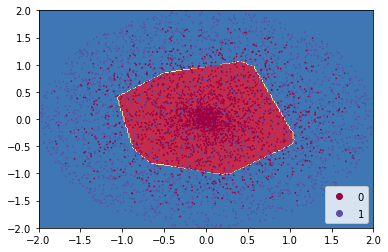

In [21]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
x1_margin = np.linspace(-2,2,200)
x2_margin = np.linspace(-2,2,200)
x1_grid, x2_grid = np.meshgrid(x1_margin,x2_margin)
x_test = np.c_[x1_grid.ravel(), x2_grid.ravel()]
y_pred = prediction(x_test,L, par)
y_pred[y_pred>=0.5]=1
y_pred[y_pred<0.5]=0

y_cont = y_pred.reshape(x1_grid.shape)


plt.contourf(x1_grid, x2_grid, y_cont, cmap=plt.cm.Spectral)
scatter = plt.scatter(x[:,0], x[:,1], c = y[:,0], cmap=plt.cm.Spectral,s=0.5)
plt.legend(*scatter.legend_elements()) # add legend
plt.show()


<a name='2.5'></a>
### 2.5 - Play by yourself!

How about we use a neural network with only one hidden layer with 5 neurons?

In [22]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
x, y = train_data_generation(5000, 100)

n_l = np.array([5,1])
L = len(n_l)
par = est_par(x, y, L,n_l,0.02, 20000, 1234)

After     0 iterations, the cost is 1.05592006
After  2000 iterations, the cost is 0.57677214
After  4000 iterations, the cost is 0.51404792
After  6000 iterations, the cost is 0.50436506
After  8000 iterations, the cost is 0.50207963
After 10000 iterations, the cost is 0.50075164
After 12000 iterations, the cost is 0.49983566
After 14000 iterations, the cost is 0.49912655
After 16000 iterations, the cost is 0.49863653
After 18000 iterations, the cost is 0.49832720


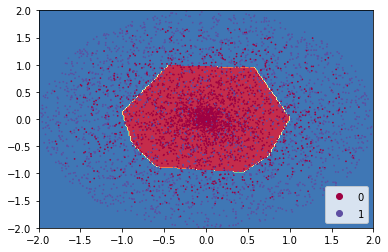

In [23]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
x1_margin = np.linspace(-2,2,200)
x2_margin = np.linspace(-2,2,200)
x1_grid, x2_grid = np.meshgrid(x1_margin,x2_margin)
x_test = np.c_[x1_grid.ravel(), x2_grid.ravel()]
y_pred = prediction(x_test,L, par)
y_pred[y_pred>=0.5]=1
y_pred[y_pred<0.5]=0

y_cont = y_pred.reshape(x1_grid.shape)


plt.contourf(x1_grid, x2_grid, y_cont, cmap=plt.cm.Spectral)
scatter = plt.scatter(x[:,0], x[:,1], c = y[:,0], cmap=plt.cm.Spectral,s=0.5)
plt.legend(*scatter.legend_elements()) # add legend
plt.show()